In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = r'C:\Users\B.J COMP\Downloads\Fruits_Vegetables\Fruits_Vegetables\train'
data_test_path = r'C:\Users\B.J COMP\Downloads\Fruits_Vegetables\Fruits_Vegetables\test'
data_val_path = r'C:\Users\B.J COMP\Downloads\Fruits_Vegetables\Fruits_Vegetables\validation'

In [3]:
image_width = 180
image_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= True,
    image_size=(image_width, image_height),
    batch_size=32,
    validation_split=False
    
)

Found 3115 files belonging to 36 classes.


In [5]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_category = data_train.class_names

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    batch_size=32,
    image_size=(image_width, image_height),
    shuffle=True,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    batch_size=32,
    image_size=(image_width,image_height),
    shuffle=True,
    validation_split=False
)

Found 359 files belonging to 36 classes.


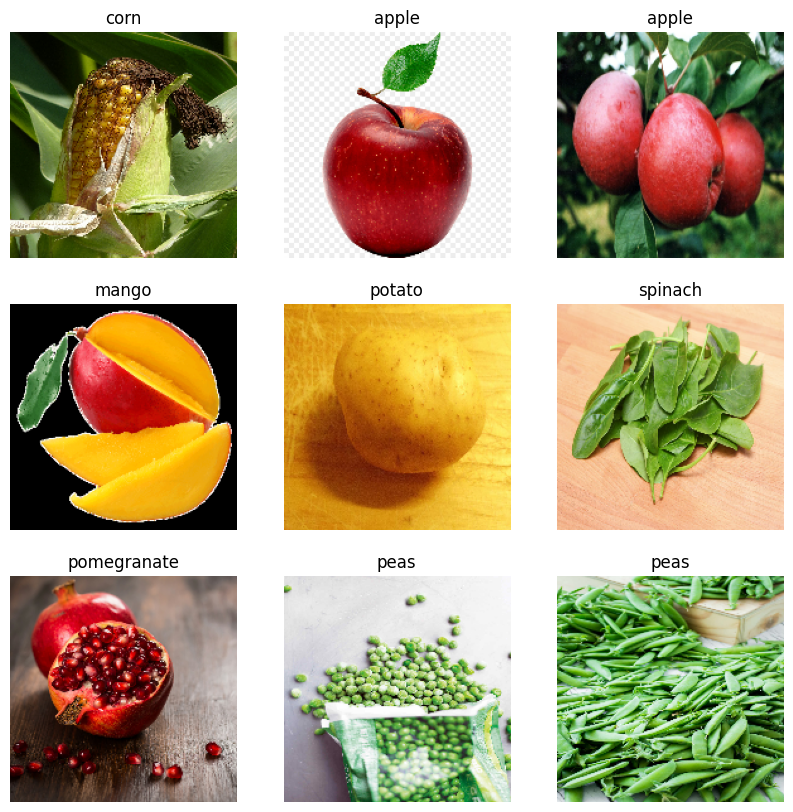

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential
 

In [11]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    #data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_category), activation='softmax')  
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])


In [14]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [15]:
epochs_size = 50
history = model.fit(data_train, validation_data= data_val, epochs=epochs_size)

Epoch 1/50
98/98 [==============================] - 98s 959ms/step - loss: 3.2898 - accuracy: 0.0925 - val_loss: 2.5704 - val_accuracy: 0.2507
Epoch 2/50
98/98 [==============================] - 100s 982ms/step - loss: 2.4952 - accuracy: 0.2777 - val_loss: 1.7130 - val_accuracy: 0.5242
Epoch 3/50
98/98 [==============================] - 98s 965ms/step - loss: 1.9611 - accuracy: 0.4238 - val_loss: 1.1155 - val_accuracy: 0.6838
Epoch 4/50
98/98 [==============================] - 98s 963ms/step - loss: 1.4083 - accuracy: 0.5833 - val_loss: 0.6587 - val_accuracy: 0.8462
Epoch 5/50
98/98 [==============================] - 102s 1s/step - loss: 0.8610 - accuracy: 0.7499 - val_loss: 0.4003 - val_accuracy: 0.9145
Epoch 6/50
98/98 [==============================] - 101s 991ms/step - loss: 0.4473 - accuracy: 0.8764 - val_loss: 0.3759 - val_accuracy: 0.9231
Epoch 7/50
98/98 [==============================] - 104s 1s/step - loss: 0.2937 - accuracy: 0.9191 - val_loss: 0.3467 - val_accuracy: 0.9402
E

Text(0.5, 1.0, 'Loss')

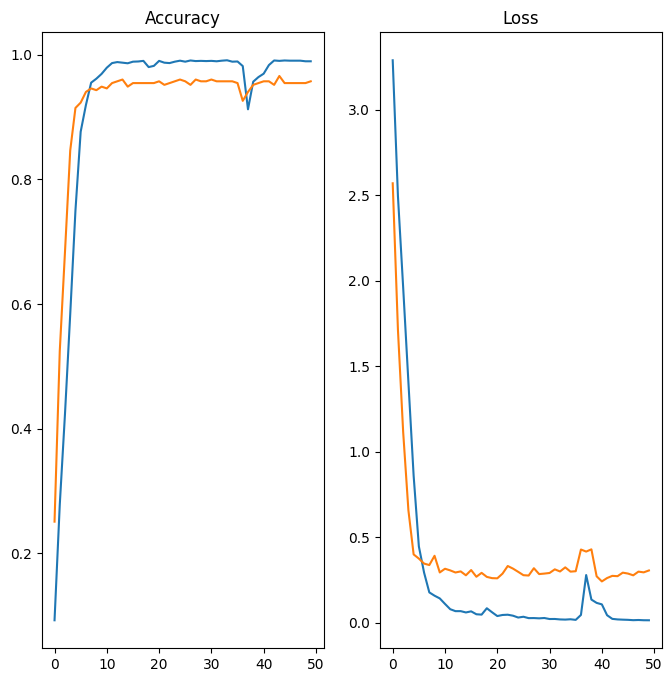

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Traning Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation_accuracy')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [42]:
image = 'carrot.jpg'
image = tf.keras.utils.load_img(image, target_size=(image_height, image_width))  
img_arr = tf.keras.utils.img_to_array(image)  
img_arr = img_arr / 255.0  
img_bat = tf.expand_dims(img_arr, 0)  


In [43]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 50ms/step


In [44]:
score = tf.nn.softmax(predict)

In [45]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)], np.max(score) * 100))


Veg/Fruit in image is eggplant with accuracy of 7.19


Publication

In [46]:
model.save('Image_classify.keras')